In [1]:
import numpy as np
import pandas as pd
import json
import gzip
from collections import Counter 
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dna = pd.read_json('../data/original/DNA_DATA_FULL.gz', compression='gzip') 

In [3]:
companies = dna[['company_codes', 'company_codes_occur', 'company_codes_about', 'company_codes_lineage', 'company_codes_relevance']]

In [4]:
#Uploading the data dictionary into a dataframe
code_dict = pd.read_csv("../data/original/companies.csv")

In [18]:
validity_col = dna[['company_codes', 'company_codes_occur', 'company_codes_about', 'company_codes_lineage', 'company_codes_relevance', 'body', 'publication_datetime']]
profile = pd.DataFrame({"Validity": np.zeros(7)}).set_index(validity_col.columns)

In [19]:
profile

,Validity
company_codes,0.0
company_codes_occur,0.0
company_codes_about,0.0
company_codes_lineage,0.0
company_codes_relevance,0.0
body,0.0
publication_datetime,0.0


In [27]:
#Here is the validity function I will be using
#returns the sum of True and divides by the length of the unique list
def checkValidity(ls, col = code_dict.code.tolist()):
    return sum([code in col for code in ls]) / len(ls) * 100

In [21]:
#Getting the unique company codes
unique_company_codes = set()
for value in companies['company_codes']:
    unique_company_codes.update(value.split(","))

#Convert set back to list
unique_company_codes = list(unique_company_codes)
unique_company_codes = unique_company_codes[1:] #The first element was '', so I didn't include it in the final list
unique_company_codes = [word.upper() for word in unique_company_codes]
print(unique_company_codes[0:10])
print("There are {} unique company codes".format(len(unique_company_codes)))

['NAVVIG', 'ZENVC', 'BOAOOU', 'SPIEBT', 'GSSIAH', 'UHAFWL', 'PUCOCR', 'SHUNII', 'OTHERP', 'MREINT']
There are 73688 unique company codes


In [22]:
#Unique companies from company_codes_occur
unique_companies_occur = set()

for value in companies['company_codes_occur']:
    unique_companies_occur.update(value.split(","))

unique_companies_occur = list(unique_companies_occur)
unique_companies_occur = unique_companies_occur[1:]
unique_companies_occur = [word.upper() for word in unique_companies_occur]
print(unique_companies_occur[0:10])
print("There are {} unique companies in unique_companies_occur".format(len(unique_companies_occur))) 

['NAVVIG', 'BOAOOU', 'SPIEBT', 'GSSIAH', 'UHAFWL', 'PUCOCR', 'SHUNII', 'OTHERP', 'BODELC', 'COSCRP']
There are 62381 unique companies in unique_companies_occur


In [23]:
#unique companies from company_codes_about
unique_companies_about = set()

for value in companies['company_codes_about']:
    unique_companies_about.update(value.split(","))

unique_companies_about = list(unique_companies_about)
unique_companies_about = unique_companies_about[1:]
unique_companies_about = [word.upper() for word in unique_companies_about]
print(unique_companies_about[0:10])
print("There are {} unique companies in unique_companies_about".format(len(unique_companies_about)))

['BOAOOU', 'SPIEBT', 'TELNMB', 'LONPNR', 'FERNZ', 'BYBNK', 'ISOAJH', 'REVCOR', 'AECOL', 'RELYPI']
There are 30780 unique companies in unique_companies_about


In [24]:
#unique companies from company_codes_relevance
unique_companies_relevance = set()

for value in companies['company_codes_relevance']:
    unique_companies_relevance.update(value.split(","))

unique_companies_relevance = list(unique_companies_relevance)
unique_companies_relevance = unique_companies_relevance[1:]
unique_companies_relevance = [word.upper() for word in unique_companies_relevance]
print(unique_companies_relevance[0:10])
print("There are {} unique companies in unique_companies_relevance".format(len(unique_companies_relevance)))

['NAVVIG', 'ZENVC', 'BOAOOU', 'SPIEBT', 'GSSIAH', 'UHAFWL', 'PUCOCR', 'SHUNII', 'OTHERP', 'MREINT']
There are 66451 unique companies in unique_companies_relevance


In [25]:
#unique companies from company_codes_lineage
unique_companies_lineage = set()

for value in companies['company_codes_lineage']:
    unique_companies_lineage.update(value.split(","))

unique_companies_lineage = list(unique_companies_lineage)
unique_companies_lineage = unique_companies_lineage[1:]

#Convert to uppercase bc data dictionary has all codes in upper case
unique_companies_lineage = [word.upper() for word in unique_companies_lineage]
print(unique_companies_lineage[0:10])
print("There are {} unique companies in unique_companies_lineage".format(len(unique_companies_lineage)))

['NAGSCO', 'ENERPL', 'FDP', 'GGCAP', 'AFRAN', 'SASILI', 'ALFLAV', 'OFFCD', 'FRMCG', 'IWKA']
There are 3467 unique companies in unique_companies_lineage


In [28]:
profile.iloc[0] = checkValidity(unique_company_codes)

In [30]:
profile.iloc[1] = checkValidity(unique_companies_occur)

In [32]:
profile.iloc[2] = checkValidity(unique_companies_about)

In [34]:
profile.iloc[3] = checkValidity(unique_companies_lineage)

In [37]:
profile.iloc[4] = checkValidity(unique_companies_relevance)

In [38]:
profile

,Validity
company_codes,86.859462
company_codes_occur,89.164970
company_codes_about,99.408707
company_codes_lineage,99.365446
company_codes_relevance,86.063415
body,0.000000
publication_datetime,0.000000


In [39]:
dates = dna['publication_datetime']

In [40]:
#Transforms the date from timestamp to a string 
dates_all_iso = []

for date in dates:
     dates_all_iso.append(dt.fromtimestamp(date/1000.0).strftime('%Y'))

In [41]:
valid_date_all_df = pd.DataFrame()
valid_date_all_df['Date'] = dates_all_iso

In [42]:
#years should be 2010 and onwards. We realllly expect to see 2013-2018 though
validity_date_all = list((valid_date_all_df['Date'] > '2009'))

valid_date_all_df['Validity'] = validity_date_all

In [43]:
print('{}%, or'.format(round(sum(valid_date_all_df['Validity'] == True) / len(valid_date_all_df['Validity']) * 100)), '{} of the data in modification datetime are valid'.format(sum(valid_date_all_df['Validity'] == True)))

100%, or 1942855 of the data in modification datetime are valid


In [44]:
#dropping all the columns except for body
text = dna['body'].fillna("Nothing")

In [45]:
#Gathering the word count for each row
word_count_all = []

for words in text:
   word_count_all.append(int(len(words.split())))

In [46]:
validity_body_all = []

#creates a loop where any text with less than 100 words or more than 10,000 words is considered an invalid 
#data point. The reason for these numbers are that anything less than 100 words does not fit our definition of
#an article and anything longer than 10,000 words is too long for us to check?
for number in word_count_all:
    if number < 100:
        validity_body_all.append(0)
        
    elif number > 10000:
        validity_body_all.append(0)
        
    else:
        validity_body_all.append(1)

In [47]:
#Validity percentage
all_total_valid = sum(validity_body_all)

print('{}%, or'.format(round(all_total_valid/len(validity_body_all)*100)), all_total_valid, 'of the data in body are valid')

78%, or 1520983 of the data in body are valid


In [48]:
profile.iloc[5] = .78286 * 100

In [52]:
profile.iloc[6] = 1.00 * 100

In [53]:
profile

,Validity
company_codes,86.859462
company_codes_occur,89.164970
company_codes_about,99.408707
company_codes_lineage,99.365446
company_codes_relevance,86.063415
body,78.286000
publication_datetime,100.000000


In [54]:
profile.to_csv("shinyDashboardBI/validitytable.csv")

In [9]:
#create profiling dataframe
prof = pd.DataFrame({"Completeness": np.zeros(len(dna.columns)).astype(int), "Uniqueness": np.zeros(len(dna.columns)).astype(int),"Duplicates": np.zeros(len(dna.columns)).astype(int)}).set_index(dna.columns)

In [10]:
prof

,Completeness,Uniqueness,Duplicates
copyright,0,0,0
subject_codes,0,0,0
art,0,0,0
modification_datetime,0,0,0
body,0,0,0
company_codes_occur,0,0,0
company_codes_about,0,0,0
company_codes_lineage,0,0,0
snippet,0,0,0
publication_date,0,0,0


In [14]:
def findCompleteness(col):
    return sum(~col.isnull()) / len(col) * 100

#NaN not counted as unique
def isUnique(col):
    return (len(col.unique()) - sum(col.isnull().unique())) / (len(col) - sum(col.isnull())) * 100

def checkDuplicates(col):
    return sum(col.duplicated()) / len(col) * 100

In [15]:
#Applying completeness to a df
prof['Completeness'] = dna.apply(findCompleteness)

#Applying the unique function
prof['Uniqueness'] = dna.apply(isUnique)

#Applying the duplicate function
prof['Duplicates'] = dna.apply(checkDuplicates)

In [16]:
prof

,Completeness,Uniqueness,Duplicates
copyright,100.000000,0.701493,99.298507
subject_codes,100.000000,17.324659,82.675341
art,100.000000,1.040685,98.959315
modification_datetime,100.000000,64.681821,35.318179
body,97.577174,82.073845,19.914610
company_codes_occur,100.000000,18.137071,81.862929
company_codes_about,100.000000,9.813290,90.186710
company_codes_lineage,100.000000,0.441875,99.558125
snippet,98.808403,90.377214,10.699666
publication_date,100.000000,21.162773,78.837227


In [17]:
prof.to_csv("shinyDashboardBI/profilingTable.csv")

<h3>Graphs for Dashboard</h3>

<h5>Publication 2013</h5>

In [7]:
dna2013 = pd.read_csv("../data/working/DNA_2013.csv")

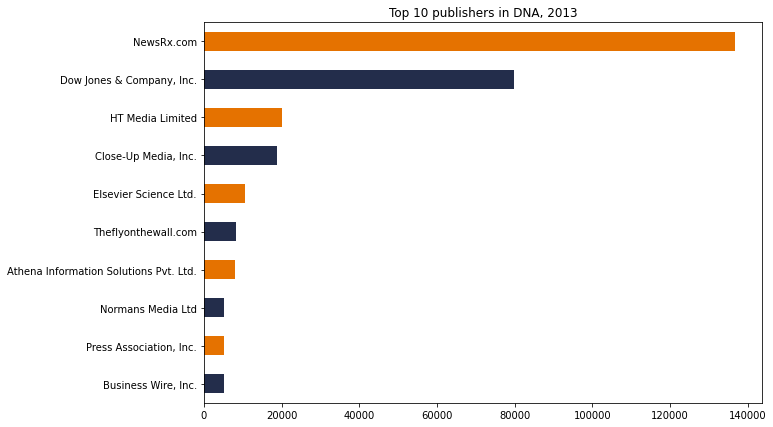

In [25]:
pub2013 = dna2013['publisher_name'].value_counts().sort_values(ascending = True).tail(10).plot(kind = "barh", title = "Top 10 publishers in DNA, 2013", color = ("#232D4B", "#E57200"), figsize = (10,7))
fig = pub2013.get_figure()
#fig = plt.figure(figsize=(9, 11))
fig.savefig('shinyDashboardBI/www/2013Publisherplot.png', bbox_inches = 'tight')

<h5>Publication 2014</h5>

In [27]:
dna2014 = pd.read_csv("../data/working/DNA_2014.csv")

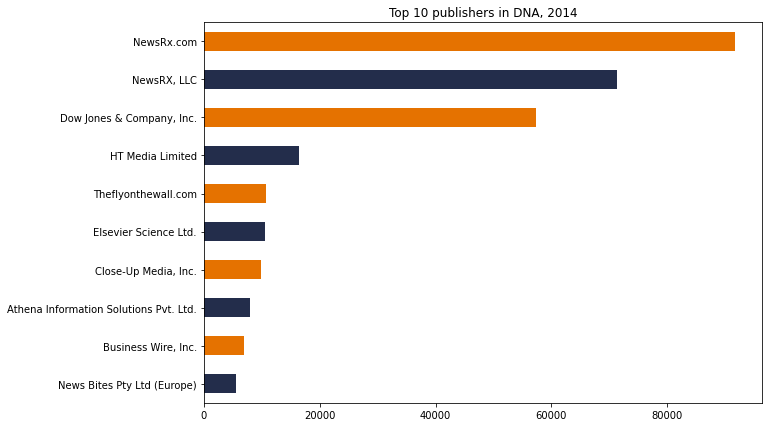

In [28]:
pub2014 = dna2014['publisher_name'].value_counts().sort_values(ascending = True).tail(10).plot(kind = "barh", title = "Top 10 publishers in DNA, 2014", color = ("#232D4B", "#E57200"), figsize = (10,7))
fig = pub2014.get_figure()
fig.savefig('shinyDashboardBI/www/2014Publisherplot.png', bbox_inches = "tight")

<h4>Publication 2015</h4>

In [3]:
dna2015 = pd.read_csv("../data/working/DNA_2015.csv")

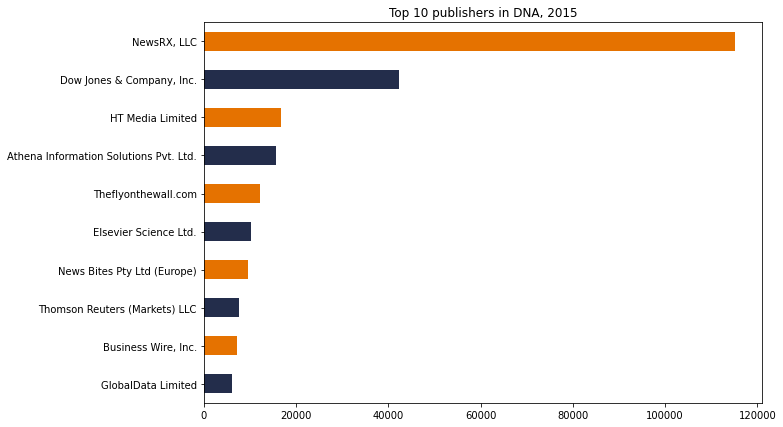

In [4]:
pub2015 = dna2015['publisher_name'].value_counts().sort_values(ascending = True).tail(10).plot(kind = "barh", title = "Top 10 publishers in DNA, 2015", color = ("#232D4B", "#E57200"), figsize = (10,7))
fig = pub2015.get_figure()
fig.savefig('shinyDashboardBI/www/2015Publisherplot.png', bbox_inches = "tight")

<h5>Publication 2016</h5>

In [5]:
dna2016 = pd.read_csv("../data/working/DNA_2016.csv")

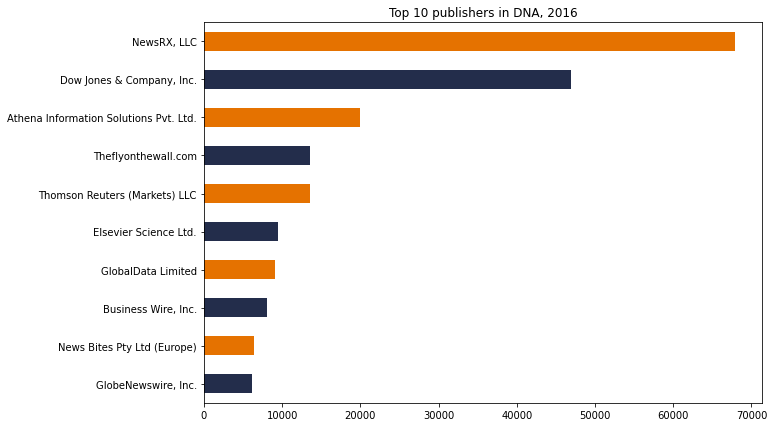

In [6]:
pub2016 = dna2016['publisher_name'].value_counts().sort_values(ascending = True).tail(10).plot(kind = "barh", title = "Top 10 publishers in DNA, 2016", color = ("#232D4B", "#E57200"), figsize = (10,7))
fig = pub2016.get_figure()
fig.savefig('shinyDashboardBI/www/2016Publisherplot.png', bbox_inches = "tight")

<h5>Publication 2017</h5>

In [8]:
dna2017 = pd.read_csv("../data/working/DNA_2017.csv")

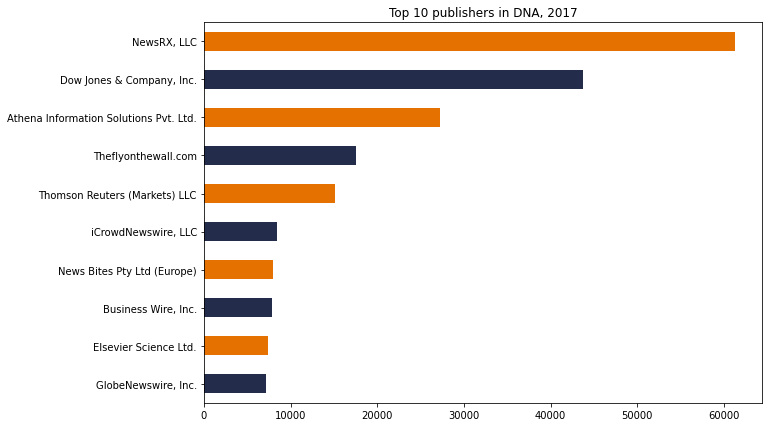

In [9]:
pub2017 = dna2017['publisher_name'].value_counts().sort_values(ascending = True).tail(10).plot(kind = "barh", title = "Top 10 publishers in DNA, 2017", color = ("#232D4B", "#E57200"), figsize = (10,7))
fig = pub2017.get_figure()
fig.savefig('shinyDashboardBI/www/2017Publisherplot.png', bbox_inches = "tight")

<h5>Publication 2018</h5>

In [10]:
dna2018 = pd.read_csv("../data/working/DNA_2018.csv")

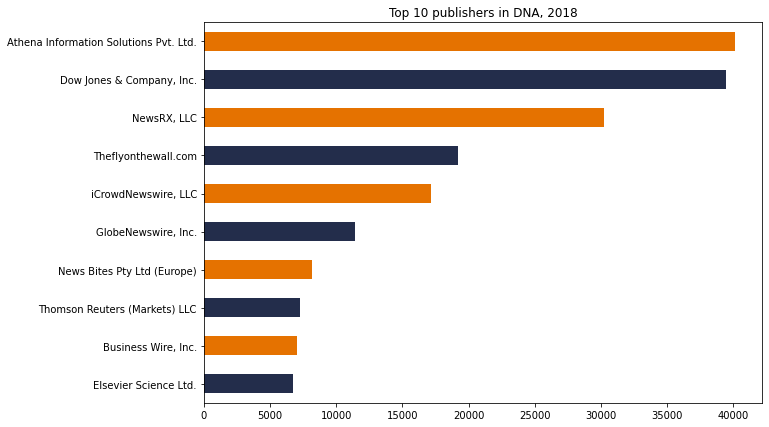

In [11]:
pub2018 = dna2018['publisher_name'].value_counts().sort_values(ascending = True).tail(10).plot(kind = "barh", title = "Top 10 publishers in DNA, 2018", color = ("#232D4B", "#E57200"), figsize = (10,7))
fig = pub2018.get_figure()
fig.savefig('shinyDashboardBI/www/2018Publisherplot.png', bbox_inches = "tight")